In [16]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM, Bidirectional
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score, classification_report
from sklearn.model_selection import train_test_split

In [17]:
data = pd.read_csv('data\preprocessed.csv').dropna()

In [18]:
X = data["Reviews_cleaned"]
y = data["Category"]

In [19]:
maxlen = 10
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index
print(f"Znaleziono {len(word_index)} unikatowych tokenów.")
data_X = pad_sequences(sequences, maxlen=maxlen)
print(f"Kształt tensora danych: {data.shape}") 
print(f"Kształt tensora etykiet: {y.shape}")

Znaleziono 9705 unikatowych tokenów.
Kształt tensora danych: (40700, 245)
Kształt tensora etykiet: (40700,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data_X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [22]:
X_train.shape, X_test.shape, X.shape

((32560, 10), (8140, 10), (40700,))

In [23]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/15
204/204 [==============================] - 12s 35ms/step - loss: 0.5132 - accuracy: 0.7561 - val_loss: 0.4708 - val_accuracy: 0.7752
Epoch 2/15
204/204 [==============================] - 6s 28ms/step - loss: 0.4331 - accuracy: 0.8100 - val_loss: 0.4539 - val_accuracy: 0.7947
Epoch 3/15
204/204 [==============================] - 6s 29ms/step - loss: 0.4158 - accuracy: 0.8214 - val_loss: 0.4480 - val_accuracy: 0.7953
Epoch 4/15
204/204 [==============================] - 6s 29ms/step - loss: 0.4048 - accuracy: 0.8291 - val_loss: 0.4577 - val_accuracy: 0.7889
Epoch 5/15
204/204 [==============================] - 6s 27ms/step - loss: 0.3970 - accuracy: 0.8344 - val_loss: 0.4588 - val_accuracy: 0.7885
Epoch 6/15
204/204 [==============================] - 6s 31ms/step - loss: 0.3902 - accuracy: 0.8395 - val_loss: 0.4528 - val_accuracy: 0.7948
Epoch 7/15
204/204 [==============================] - 6s 30ms/step - loss: 0.3855 - accuracy: 0.8410 - val_loss: 0.4733 - val_accuracy: 0.781

In [26]:
import matplotlib.pyplot as plt
def plot_history(history, key="loss"):
    metric = history.history[key]
    val_metric = history.history[f"val_{key}"]
    epochs = range(len(metric))
    plt.plot(epochs, metric, "bo", label=f"{key} - train")
    plt.plot(epochs, val_metric, "b", label=f"{key} - val")
    plt.title(f"training - {key}")
    plt.legend()
    plt.show()

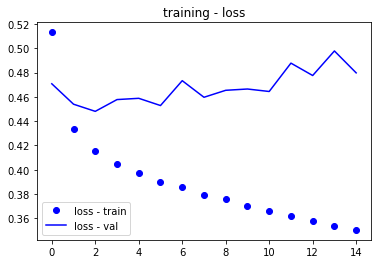

In [27]:
plot_history(history)

In [28]:
y_pred = np.round(model.predict(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.55      0.63      2509
         1.0       0.82      0.91      0.86      5631

    accuracy                           0.80      8140
   macro avg       0.78      0.73      0.75      8140
weighted avg       0.79      0.80      0.79      8140



In [29]:
cohen_kappa_score(y_test, y_pred)

0.49528428517793477

In [30]:
f1_score(y_test, y_pred)

0.8626493856253156